In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
# note: when there is a % it is not really python, in this example we tell the system not to open another window when doing 
# matplotlib

****** EDA & Data Cleaning ******

*** Loading the Dataset ***

In [2]:
df_demo = pd.read_csv('df_final_demo.txt', delimiter=',') 
df_exp_clients = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')
df_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
df_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')


*** Initial exploration ***

In [3]:
# Function to analyse the four data files and see how to merge them before clean up

def first_analysis(dataf):
    display(dataf.head())
    display(dataf.columns)
    display(f'shape: {dataf.shape}')
    display(dataf.dtypes)
    display(dataf.isnull().sum().sort_values(ascending=False))


In [4]:
first_analysis(df_demo)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

'shape: (70609, 9)'

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [5]:
first_analysis(df_exp_clients)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


Index(['client_id', 'Variation'], dtype='object')

'shape: (70609, 2)'

client_id     int64
Variation    object
dtype: object

Variation    20109
client_id        0
dtype: int64

In [6]:
first_analysis(df_data_pt_1)
first_analysis(df_data_pt_2)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

'shape: (343141, 5)'

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

'shape: (412264, 5)'

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [7]:
# Conclusions: all the data types seem to be properly defined, from the 4 tables, all have client_id, we could:
# merge the two with 70609 lines together on the client_id, and concatenate the 2 others
# some missing values 14-15 in the clients details, still to keep the data so far
# what is the use of visitor_id vs visit_id + client_id
# to check for duplicates

*** Exploring numerical and categorical variables ***

** Preparing the data **

In [9]:
# A to merge the two first files on client_id, and check the data (nulls, columns...) => to remove the 'useless columns'
# possibly to convert the numerical ones in int instead of float if needed
# B to concat the two last files on top of each other and check for duplicates... before organising the categories

In [10]:
df1 = pd.merge(df_exp_clients, df_demo, how = 'outer', on = 'client_id') # outer to keep the 15 empty values in case of
df2 = pd.concat([df_data_pt_1, df_data_pt_2])
display(df1)
display(df2)

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
70604,2443347,NaN,17.0,204.0,52.5,M,3.0,164693.48,7.0,7.0
70605,8788427,NaN,10.0,121.0,59.5,M,2.0,203149.13,3.0,3.0
70606,266828,NaN,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0
70607,1266421,NaN,13.0,164.0,33.0,M,3.0,27701.79,2.0,3.0


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


*** Data Cleaning *** 
Checking for null values or columns to drop, A & B; removing duplicates

In [22]:
df2 = df2.drop_duplicates().reset_index(drop = True) # removing the duplicates


In [26]:
display(df1.nunique()) # checking if the columns should be categorical or numerical, and checking if there are Nas
df1.nunique(dropna=False)

client_id           70609
Variation               2
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70328
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

client_id           70609
Variation               3
clnt_tenure_yr         55
clnt_tenure_mnth      483
clnt_age              166
gendr                   5
num_accts               9
bal                 70329
calls_6_mnth            9
logons_6_mnth          10
dtype: int64

In [27]:
display(df2.nunique()) # checking if the columns should be categorical or numerical, and checking if there are Nas
df2.nunique(dropna=False)

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [37]:
numerical_df1 = ['clnt_tenure_yr','clnt_tenure_mnth','clnt_age', 'bal']
categorical_df1= ['client_id', 'Variation', 'gendr', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']

df2.process_step.value_counts()

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

*** Univariate Analysis ***
** Categorical Variables **
* Frequency Tables *

* Visualisation * (Bar charts, countplots, piecharts)

** Numerical Variables **
* Summary Statistics - Centrality and Dispersion Measures *

* Shape of distribution *

* Visualisation * (histograms, histo all at once, boxplots)

In [32]:
type(df1['clnt_age'].value_counts(normalize=True))

pandas.core.series.Series

In [ ]:
* Converting continuous to discrete variables: Discretization * (if needed)

In [11]:
if isinstance(df1['clnt_age'][0], float):
    print('ca marche')

ca marche


In [35]:
def num_stats(df, column):
    """Function to generate the statistical data for numerical columns à la describe with mode in addition"""
    #if isinstance(df[column][0], float):
    mean_col = df[column].mean().round()
    median_col = df[column].median()
    mode_col = df[column].mode()[0]
    variance_col = round(df[column].var(),2)
    std_dev_col = round(df[column].std(),2)
    min_col = df[column].min()
    max_col = df[column].max()
    range_col = max_col - min_col
    quantiles_col = df[column].quantile([0.25, 0.5, 0.75])

    print(f'mean= {mean_col}, median= {median_col}, mode= {mode_col}')
    print(f'var = {variance_col}, std_dev = {std_dev_col}, min = {min_col}, max = {max_col}, range = {range_col}')
    print(f'quantiles : \n{quantiles_col}')
    display(df[column].describe())
    
    # Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
    # 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
    # 'bins=30' divides the data into 30 bins for more detailed granularity
    # 'color="salmon"' sets the color of the bars to salmon
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    return
    

def cat_stats(df, column):
    """Function to generate the statistical data for categorical columns"""
    frequency_table = df[column].value_counts()
    # Calculating the proportion of each unique value 
    proportion_table = df[column].value_counts(normalize=True)
    
    skewness_price = proportion_table.skew()
    kurtosis_price = proportion_table.kurtosis()
    display(skewness_price, kurtosis_price)
    
    display(frequency_table, proportion_table)
    mode_col = df[column].mode()
    display(f'mode = {mode_col}')
    # Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
    sns.countplot(data=df, x= column, palette="Set1")
    
    
        

In [ ]:
numerical_df1 = ['clnt_tenure_yr','clnt_tenure_mnth','clnt_age', 'bal']
categorical_df1= ['client_id', 'Variation', 'gendr', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']

num_stats(df1, 'clnt_tenure_yr' )
    



0

0

client_id
9988021    1
4555516    1
4998932    1
3385751    1
4339267    1
          ..
7675264    1
5574016    1
573200     1
9466333    1
9895983    1
Name: count, Length: 70609, dtype: int64

client_id
9988021    0.000014
4555516    0.000014
4998932    0.000014
3385751    0.000014
4339267    0.000014
             ...   
7675264    0.000014
5574016    0.000014
573200     0.000014
9466333    0.000014
9895983    0.000014
Name: proportion, Length: 70609, dtype: float64

'mode = 0            169\n1            555\n2            647\n3            722\n4            934\n          ...   \n70604    9999400\n70605    9999626\n70606    9999729\n70607    9999832\n70608    9999839\nName: client_id, Length: 70609, dtype: int64'

KeyboardInterrupt: 

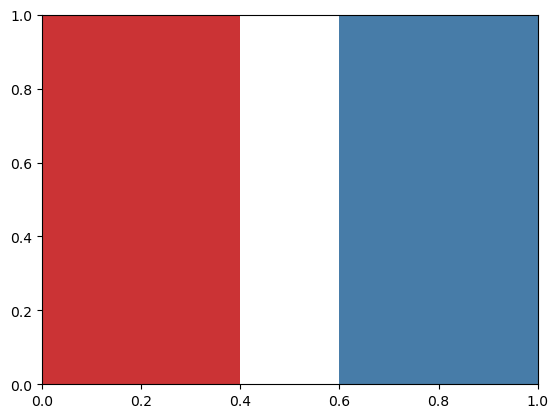

In [39]:
for col in categorical_df1:
    cat_stats(df1, col)

In [43]:
num_stats(df1,'clnt_age')

mean= 46.0, median= 47.0, mode= 58.5
var = 243.09, std_dev = 15.59, min = 13.5, max = 96.0, range = 82.5
quantiles : 
0.25    32.5
0.50    47.0
0.75    59.0
Name: clnt_age, dtype: float64


count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

In [ ]:
# Exporting to my_sql if needed (to make a function if time)

In [44]:
from sqlalchemy import create_engine 
import pymysql.cursors
import os
# import getpass
import urllib.parse


urllib.parse.quote_plus('!') # parse to 'remove-change' the weird characters in our password, here it is '!'
urllib.parse.quote_plus('é')
pw_raw = 'Alsimar10' # os.getenv('mysql_andy') # I had to put my.sql password
pw = urllib.parse.quote_plus(pw_raw)

#engine = sqlalchemy.create_engine(f"mysql://{username}:{password}@{host}:{port}")

connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/' # we connect to our computer, if we connect to a company
                     # this is the driver                             # data base, then we need an IP address
engine = create_engine(connection_string)

with engine.connect() as conn:                                   # we are creating an alias
    conn.execute(f"CREATE DATABASE IF NOT EXISTS vanguard") # we are creating a new name of database "vanguard"

In [45]:
df1.to_sql('df1',engine, 'vanguard', if_exists='replace', index=False) # 'pushing' the data
df2.to_sql('df2',engine, 'vanguard', if_exists='replace', index=False) # 'pushing' the data

755405